In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Making imports

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

### Loading Data

In [20]:
file_path = "/kaggle/input/csvsalesdataset/Coffee Shop Sales.csv"

df = pd.read_csv(file_path)
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


### Exploring Dataset

In [21]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

### converting dates and create revenue column

In [22]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['revenue'] = df['transaction_qty'] * df['unit_price']
df[['transaction_date','transaction_qty', 'unit_price', 'revenue']].head()

,transaction_date,transaction_qty,unit_price,revenue
0,2023-01-01,2,3.0,6.0
1,2023-01-01,2,3.1,6.2
2,2023-01-01,2,4.5,9.0
3,2023-01-01,1,2.0,2.0
4,2023-01-01,2,3.1,6.2


### Basic Statistics

### Computing Basic Satistics on data

In [23]:
df[['transaction_qty', 'unit_price', 'revenue']].describe()

,transaction_qty,unit_price,revenue
count,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367
std,0.542509,2.658723,4.227099
min,1.000000,0.800000,0.800000
25%,1.000000,2.500000,3.000000
50%,1.000000,3.000000,3.750000
75%,2.000000,3.750000,6.000000
max,8.000000,45.000000,360.000000


### group by product category


In [24]:
df.groupby('product_category')['revenue'].mean().sort_values(ascending=False)
# identifying interesting patterns like busiest day
df.groupby('transaction_date')['revenue'].sum().sort_values(ascending=False)

transaction_date
2023-06-19    6403.91
2023-06-13    6189.36
2023-06-08    6151.59
2023-06-17    6117.60
2023-06-18    6026.09
               ...   
2023-01-06    2273.85
2023-01-04    2220.10
2023-02-06    2203.40
2023-01-29    2060.75
2023-01-28    2037.10
Name: revenue, Length: 181, dtype: float64

### 1. Line Chart → Daily Total Revenue Over Time

<function matplotlib.pyplot.show(close=None, block=None)>

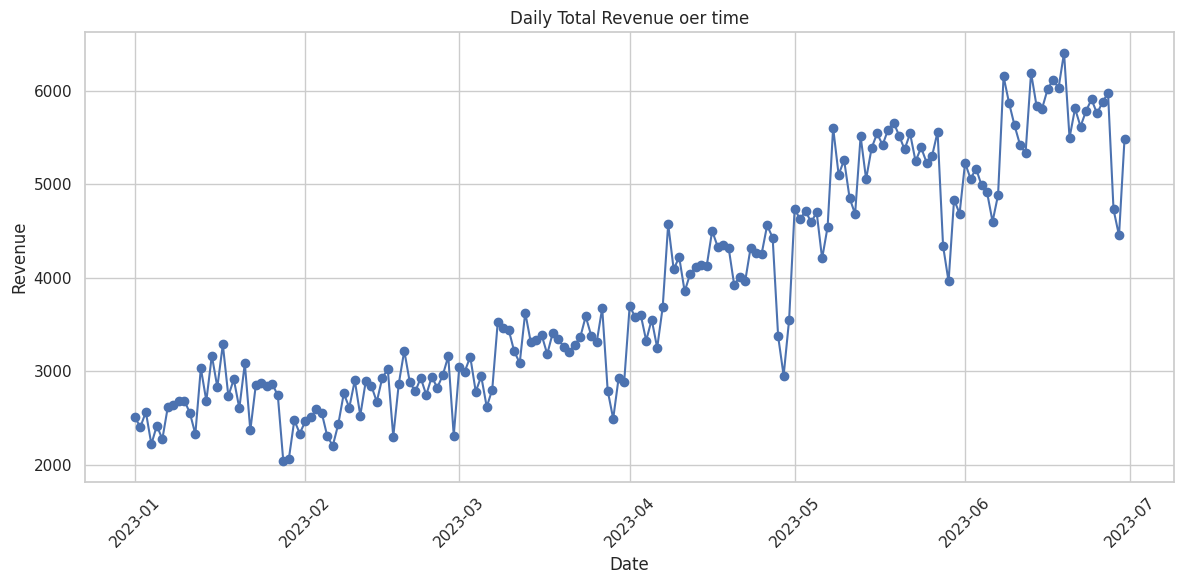

In [25]:
daily_revenue = df.groupby('transaction_date')['revenue'].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o')
plt.title("Daily Total Revenue oer time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

### 2. Bar Chart → Top 10 Product Categories by Revenue

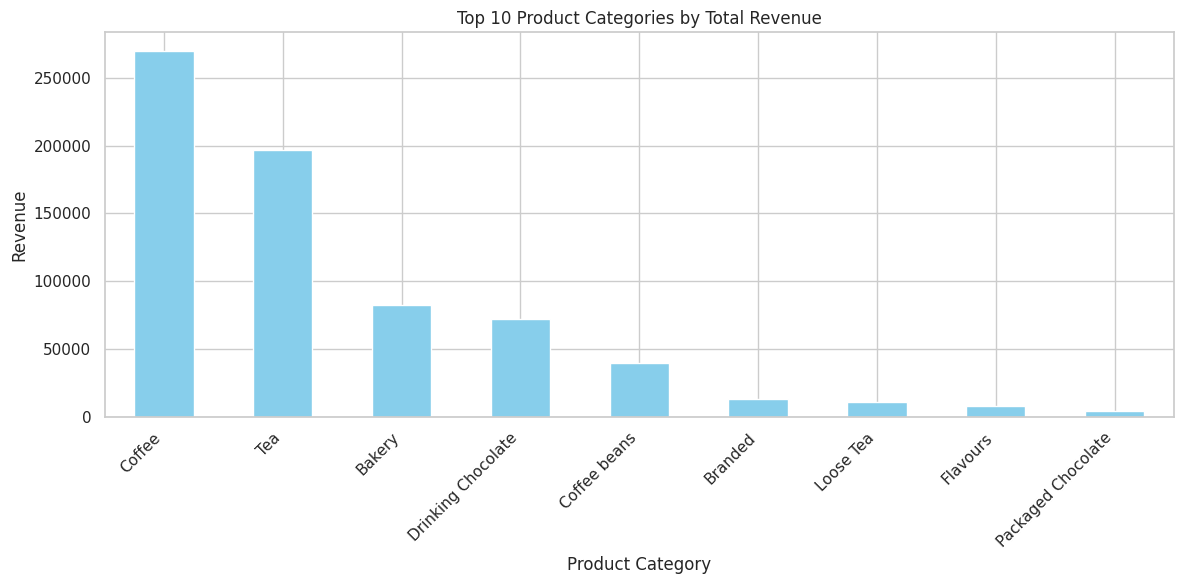

In [26]:
category_revenue = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title("Top 10 Product Categories by Total Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 ### 3. Histogram → Distribution of Transaction Quantities

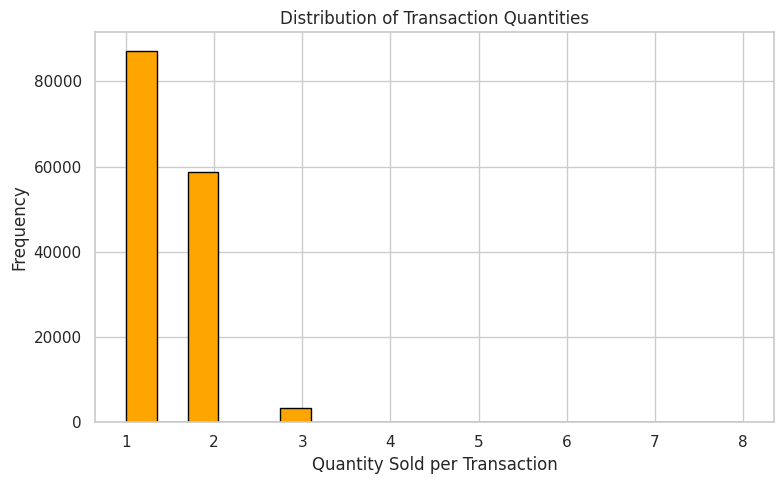

In [27]:
plt.figure(figsize=(8,5))
plt.hist(df['transaction_qty'],bins=20, color='orange',edgecolor='black')
plt.title("Distribution of Transaction Quantities")
plt.xlabel("Quantity Sold per Transaction")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### plt.title("Distribution of Transaction Quantities")


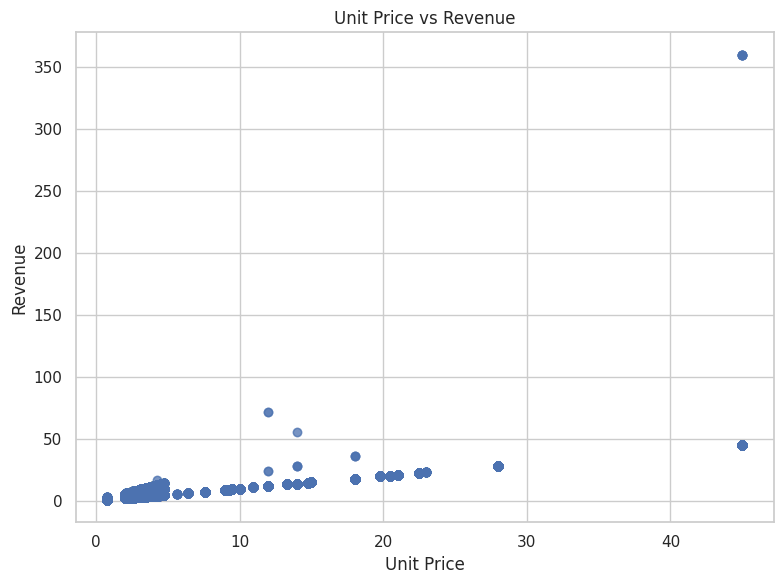

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df['unit_price'], df['revenue'], alpha=0.5)
plt.title("Unit Price vs Revenue")
plt.xlabel("Unit Price")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


## *Final Observations and Recomendations ***

#  Normalization Findings and Recommendations

## 1. First Normal Form (1NF)
-  The dataset **meets 1NF requirements**.

---

## 2. Second Normal Form (2NF)
  - Product details (e.g., `product_category`, `unit_price`) are repeating for every transaction.
  - These should be separated into a **Products** table.

**Recommendation:**
- Create separate tables:
  - `Transactions` (transaction_id, date, time, store_id)
  - `Products` (product_id, category, type, detail, price)
  - `Sales` (transaction_id, product_id, qty, revenue)

---

## 3. Third Normal Form (3NF)

  - `store_location` depends on `store_id`, not on the transaction itself.
  - This creates redundancy across multiple rows.

**Recommendation:**
- Move `store_id` and `store_location` into a **Stores** table.
- Link `Transactions` table to `Stores` using `store_id`.

---

## 4. Additional Improvements
- Create lookup tables for:
  - `Product Categories`
  - `Product Types`
- This ensures consistency and reduces redundancy.
- Add indexes on foreign keys (`transaction_id`, `product_id`, `store_id`) for faster queries.

---

#  Conclusion
The dataset is already in **1NF**, but moving towards **2NF and 3NF** will:
- Reduce data redundancy
- Improve consistency
- Make queries more efficient
